In [349]:
import pandas as pd
import xlsxwriter as xls
import numpy as np
from scipy.stats import kurtosis, shapiro, skew, kstest, kurtosistest, skewtest, iqr
#import matplotlib.pyplot as plt
#%matplotlib inline

In [350]:
dfs = {
    'CadariEngenharia': pd.read_csv('../DadosFonte/cadariengenhariaearquiteturalt0.csv', sep=',', encoding='ISO-8859-1'),
    'CombogoComunicacao': pd.read_csv('../DadosFonte/combogocomunicacao.csv', sep=',', encoding='ISO-8859-1'),
    'DegrauArquitetos': pd.read_csv('../DadosFonte/degrauarquitetosassociados.csv', sep=',', encoding='ISO-8859-1'),
    'EduardoPepato': pd.read_csv('../DadosFonte/eduardopepato.csv', sep=',', encoding='ISO-8859-1'),
    'Espeo': pd.read_csv('../DadosFonte/espeo.csv', sep=',', encoding='ISO-8859-1'),
    'Fast': pd.read_csv('../DadosFonte/fast.csv', sep=',', encoding='ISO-8859-1'),
    'Fisiotrauma': pd.read_csv('../DadosFonte/fisiotrauma.csv', sep=',', encoding='ISO-8859-1'),
    'gestaoNaPratica': pd.read_csv('../DadosFonte/gestaonapratica.csv', sep=',', encoding='ISO-8859-1'),
    'GrupoDamiam': pd.read_csv('../DadosFonte/grupodamiam.csv', sep=',', encoding='ISO-8859-1'),
    'InovaEmpresaJunior': pd.read_csv('../DadosFonte/inovaempresajunior.csv', sep=',', encoding='ISO-8859-1'),
    'LuzEmSolucoes': pd.read_csv('../DadosFonte/luzemssolucoesempresariais.csv', sep=',', encoding='ISO-8859-1'),
    'MarteInovacaoCultural': pd.read_csv('../DadosFonte/marteinovacaocultural.csv', sep=',', encoding='ISO-8859-1'),
    'Mekatronik': pd.read_csv('../DadosFonte/mekatronik.csv', sep=',', encoding='ISO-8859-1'),
    'NorthStarshipping': pd.read_csv('../DadosFonte/northstarshippingservices.csv', sep=',', encoding='ISO-8859-1'),
    'primusconsultoriaempresarial': pd.read_csv('../DadosFonte/primusconsultoriaempresarial.csv', sep=',', encoding='ISO-8859-1'),
    'signo': pd.read_csv('../DadosFonte/signo.csv', sep=',', encoding='ISO-8859-1'),
    'spazioarchidesign': pd.read_csv('../DadosFonte/spazioarchidesign.csv', sep=',', encoding='ISO-8859-1'),
    'tectobrastelecomltda': pd.read_csv('../DadosFonte/tectobrastelecomltda.csv', sep=',', encoding='ISO-8859-1'),
    'tkcconsulting': pd.read_csv('../DadosFonte/tkcconsulting.csv', sep=',', encoding='ISO-8859-1'),
    'wodesign0': pd.read_csv('../DadosFonte/wodesign0.csv', sep=',', encoding='ISO-8859-1')}

In [351]:
#dfs['Cadari'].head()



### Algoritmos de teste de normalização

In [352]:
#todas as funçÕes que são nativas da biblioteca são com o inicio em minusculo, as minhas em maiusculo.

def Kurtosis(df):
    if kurtosis(df, fisher=True) > 0:
        return 1
    else:
        return 0
    
def Shapiro(df):
    # p-value
    if (shapiro(df)[1]) > 0.05:
        return 1
    else:
        return 0
    
def Skewness(df):
    if (skew(df) >= -0.5) and (skew(df) <= 0.5):
        return 1
    else:
        return 0
    
def Kolmogorov(df):
    #print(kstest(df, 'norm'))
    if kstest(df, 'norm')[1] > 0.05:
        return 1
    else:
        return 0

#funções apenas para o grupo 3   
def KurtosisTest(df):
    if kurtosistest(df)[1] > 0.05:
        return 1
    else:
        return 0

def SkewTest(df):
    if skewtest(df)[1] > 0.05:
        return 1
    else:       
        return 0

In [353]:
'''
#verifica se é NORMAL se pelo menos 3 testes dos 4 forem positivos
def normal():
    
#verifica se é  EMPATE se exatamente 2 testes dos 4 forem positivos
def empate():
'''
    

'\n#verifica se é NORMAL se pelo menos 3 testes dos 4 forem positivos\ndef normal():\n    \n#verifica se é  EMPATE se exatamente 2 testes dos 4 forem positivos\ndef empate():\n'

### Manipulando planilhas

In [354]:
worksheet = xls.Workbook('../AnaliseExploratoria/PlanilhaResultado.xlsx')

aba_grupo1 = worksheet.add_worksheet('Grupo 1')
aba_grupo2 = worksheet.add_worksheet('Grupo 2')
aba_grupo3 = worksheet.add_worksheet('Grupo 3')


In [355]:
bold = worksheet.add_format({'bold': 1})

aba_grupo1.write('A1', 'Lançamentos de todas as empresas de 6 a 10', bold)
aba_grupo1.write('B1', 'Quantidade de lançamentos', bold)
aba_grupo1.write('C1', 'Valor Kurtosis', bold)
aba_grupo1.write('D1', 'P-value Kurtosis', bold)
aba_grupo1.write('E1', 'Kurtosis', bold)
aba_grupo1.write('F1', 'Valor Shapiro', bold)
aba_grupo1.write('G1', 'P-value Shapiro', bold)
aba_grupo1.write('H1', 'Shapiro', bold)
aba_grupo1.write('I1', 'Valor Skewness', bold)
aba_grupo1.write('J1', 'P-value Skewness', bold)
aba_grupo1.write('K1', 'Skewness', bold)
aba_grupo1.write('L1', 'Valor Kolmogorov', bold)
aba_grupo1.write('M1', 'P-value Kolmogorov', bold)
aba_grupo1.write('N1', 'Kolmogorov', bold)
aba_grupo1.write('O1', 'Todos V', bold)
aba_grupo1.write('P1', 'Todos F', bold)
aba_grupo1.write('Q1', 'Apenas Kurtosis V', bold)
aba_grupo1.write('R1', 'Apenas Shapiro V', bold)
aba_grupo1.write('S1', 'Apenas Skewness V', bold)
aba_grupo1.write('T1', 'Apenas Kolmogorov V', bold)
aba_grupo1.write('U1', 'Kurtosis e Shapiro V', bold)
aba_grupo1.write('V1', 'Kurtosis e Skewness V', bold)
aba_grupo1.write('W1', 'Shapiro e Skewness V', bold)
aba_grupo1.write('X1', 'Kurtosis e Kolmogorov V', bold)
aba_grupo1.write('Y1', 'Skewness e Kolmogorov V', bold)
aba_grupo1.write('Z1', 'Shapiro e Kolmogorov V', bold)
aba_grupo1.write('AA1', 'Valor Máximo', bold)
aba_grupo1.write('AB1', 'Média', bold)
aba_grupo1.write('AC1', 'Desvio padrão', bold)
aba_grupo1.write('AD1', 'Alpha', bold)
aba_grupo1.write('AE1', 'Limite Gama', bold)
aba_grupo1.write('AF1', 'Normal | Empate', bold)
aba_grupo1.write('AG1', 'Distância interquartil', bold)

aba_grupo2.write('A1', 'Lançamentos de todas as empresas de 11 a 20', bold)
aba_grupo2.write('B1', 'Quantidade de lançamentos', bold)
aba_grupo2.write('C1', 'Valor Kurtosis', bold)
aba_grupo2.write('D1', 'P-value Kurtosis', bold)
aba_grupo2.write('E1', 'Kurtosis', bold)
aba_grupo2.write('F1', 'Valor Shapiro', bold)
aba_grupo2.write('G1', 'P-value Shapiro', bold)
aba_grupo2.write('H1', 'Shapiro', bold)
aba_grupo2.write('I1', 'Valor Skewness', bold)
aba_grupo2.write('J1', 'P-value Skewness', bold)
aba_grupo2.write('K1', 'Skewness', bold)
aba_grupo2.write('L1', 'Valor Kolmogorov', bold)
aba_grupo2.write('M1', 'P-value Kolmogorov', bold)
aba_grupo2.write('N1', 'Kolmogorov', bold)
aba_grupo2.write('O1', 'Todos V', bold)
aba_grupo2.write('P1', 'Todos F', bold)
aba_grupo2.write('Q1', 'Apenas Kurtosis V', bold)
aba_grupo2.write('R1', 'Apenas Shapiro V', bold)
aba_grupo2.write('S1', 'Apenas Skewness V', bold)
aba_grupo2.write('T1', 'Apenas Kolmogorov V', bold)
aba_grupo2.write('U1', 'Kurtosis e Shapiro V', bold)
aba_grupo2.write('V1', 'Kurtosis e Skewness V', bold)
aba_grupo2.write('W1', 'Shapiro e Skewness V', bold)
aba_grupo2.write('X1', 'Kurtosis e Kolmogorov V', bold)
aba_grupo2.write('Y1', 'Skewness e Kolmogorov V', bold)
aba_grupo2.write('Z1', 'Shapiro e Kolmogorov V', bold)
aba_grupo2.write('AA1', 'Valor Máximo', bold)
aba_grupo2.write('AB1', 'Média', bold)
aba_grupo2.write('AC1', 'Desvio padrão', bold)
aba_grupo2.write('AD1', 'Alpha', bold)
aba_grupo2.write('AE1', 'Limite Gama', bold)
aba_grupo2.write('AF1', 'Normal | Empate', bold)
aba_grupo2.write('AG1', 'Distância interquartil', bold)

aba_grupo3.write('A1', 'Lançamentos de todas as empresas acima de 21', bold)
aba_grupo3.write('B1', 'Quantidade de lançamentos', bold)
aba_grupo3.write('C1', 'Valor Kurtosis', bold)
aba_grupo3.write('D1', 'P-value Kurtosis', bold)
aba_grupo3.write('E1', 'Kurtosis', bold)
aba_grupo3.write('F1', 'Valor Shapiro', bold)
aba_grupo3.write('G1', 'P-value Shapiro', bold)
aba_grupo3.write('H1', 'Shapiro', bold)
aba_grupo3.write('I1', 'Valor Skewness', bold)
aba_grupo3.write('J1', 'P-value Skewness', bold)
aba_grupo3.write('K1', 'Skewness', bold)
aba_grupo3.write('L1', 'Valor Kolmogorov', bold)
aba_grupo3.write('M1', 'P-value Kolmogorov', bold)
aba_grupo3.write('N1', 'Kolmogorov', bold)
aba_grupo3.write('O1', 'Todos V', bold)
aba_grupo3.write('P1', 'Todos F', bold)
aba_grupo3.write('Q1', 'Apenas Kurtosis V', bold)
aba_grupo3.write('R1', 'Apenas Shapiro V', bold)
aba_grupo3.write('S1', 'Apenas Skewness V', bold)
aba_grupo3.write('T1', 'Apenas Kolmogorov V', bold)
aba_grupo3.write('U1', 'Kurtosis e Shapiro V', bold)
aba_grupo3.write('V1', 'Kurtosis e Skewness V', bold)
aba_grupo3.write('W1', 'Shapiro e Skewness V', bold)
aba_grupo3.write('X1', 'Kurtosis e Kolmogorov V', bold)
aba_grupo3.write('Y1', 'Skewness e Kolmogorov V', bold)
aba_grupo3.write('Z1', 'Shapiro e Kolmogorov V', bold)
aba_grupo3.write('AA1', 'Valor Máximo', bold)
aba_grupo3.write('AB1', 'Média', bold)
aba_grupo3.write('AC1', 'Desvio padrão', bold)
aba_grupo3.write('AD1', 'Alpha', bold)
aba_grupo3.write('AE1', 'Limite Gama', bold)
aba_grupo3.write('AF1', 'Normal | Empate', bold)
aba_grupo3.write('AG1', 'Distância interquartil', bold)

0

In [356]:
def tabela_verdade(aba_grupo, num_linhas, KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar):
    #todos verdadeiros
    if (KurtosisVar == 1 and ShapiroVar == 1 and SkewnessVar == 1 and KolmogorovVar == 1) :
        aba_grupo.write('O' + str(num_linhas), 1)
    else:  
        aba_grupo.write('O' + str(num_linhas), 0)

    #todos falsos
    if (KurtosisVar == 0 and ShapiroVar == 0 and SkewnessVar == 0 and KolmogorovVar == 0) :
        aba_grupo.write('P' + str(num_linhas), 1)
    else:  
        aba_grupo.write('P' + str(num_linhas), 0)

    #Apenas Kurtosis Verdadeiro
    if (KurtosisVar == 1 and ShapiroVar == 0 and SkewnessVar == 0) :
        aba_grupo.write('Q' + str(num_linhas), 1)
    else:  
        aba_grupo.write('Q' + str(num_linhas), 0)

    #Apenas Shapiro Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 1 and SkewnessVar == 0) :
        aba_grupo.write('R' + str(num_linhas), 1)
    else:  
        aba_grupo.write('R' + str(num_linhas), 0)

    #Apenas Skewness Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 0 and SkewnessVar == 1) :
        aba_grupo.write('S' + str(num_linhas), 1)
    else:  
        aba_grupo.write('S' + str(num_linhas), 0)
    
    #Apenas Kolmogorov Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 0 and SkewnessVar == 0 and KolmogorovVar == 1):
        aba_grupo.write('T' + str(num_linhas), 1)
    else:
        aba_grupo.write('T' + str(num_linhas), 0)
        
    #Apenas Kurtosis e Shapiro Verdadeiro
    if (KurtosisVar == 1 and ShapiroVar == 1 and SkewnessVar == 0) :
        aba_grupo.write('U' + str(num_linhas), 1)
    else:  
        aba_grupo.write('U' + str(num_linhas), 0)

    #Apenas Kurtosis e Skewness Verdadeiro
    if (KurtosisVar == 1 and ShapiroVar == 0 and SkewnessVar == 1) :
        aba_grupo.write('V' + str(num_linhas), 1)
    else:  
        aba_grupo.write('V' + str(num_linhas), 0)

    #Apenas shapiro e Skewness Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 1 and SkewnessVar == 1) :
        aba_grupo.write('W' + str(num_linhas), 1)
    else:  
        aba_grupo.write('W' + str(num_linhas), 0)
        
    #Apenas Kurtosis e Kolmogorov Verdadeiro
    if (KurtosisVar == 1 and ShapiroVar == 0 and SkewnessVar == 0 and KolmogorovVar == 1) :
        aba_grupo.write('X' + str(num_linhas), 1)
    else:  
        aba_grupo.write('X' + str(num_linhas), 0)
    
    #Apenas Skewness e Kolmogorov Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 0 and SkewnessVar == 1 and KolmogorovVar == 1) :
        aba_grupo.write('Y' + str(num_linhas), 1)
    else:  
        aba_grupo.write('Y' + str(num_linhas), 0)
        
    #Apenas Shapiro e Kolmogorov Verdadeiro
    if (KurtosisVar == 0 and ShapiroVar == 1 and SkewnessVar == 0 and KolmogorovVar == 1) :
        aba_grupo.write('Z' + str(num_linhas), 1)
    else:  
        aba_grupo.write('Z' + str(num_linhas), 0)
    

In [357]:
def normal_empate(aba_grupo, num_linhas, array_testes):
    count = 0
    
    for teste in array_testes:
        if teste == 1:
            count += 1
    
    if count >= 3: 
        aba_grupo.write('AF' + str(num_linhas), 'Normal')
    elif count == 2:
        aba_grupo.write('AF' + str(num_linhas), 'Empate')
    else:
        aba_grupo.write('AF' + str(num_linhas), 'Não atende')

In [358]:
num_linhas_1 = 2
num_linhas_2 = 2
num_linhas_3 = 2

for key, df in dfs.items():
    for categoria in df.Categoria.unique():
        if((len(df[df.Categoria == categoria]) >= 6) and (len(df[df.Categoria == categoria]) <= 10)):
            
            KurtosisVar = Kurtosis(df[df.Categoria == categoria].Value)
            ShapiroVar = Shapiro(df[df.Categoria == categoria].Value)
            SkewnessVar = Skewness(df[df.Categoria == categoria].Value)
            KolmogorovVar = Kolmogorov(df[df.Categoria == categoria].Value)
            
            aba_grupo1.write('A' + str(num_linhas_1), categoria + ' - ' + key)
            aba_grupo1.write('B' + str(num_linhas_1), len(df[df.Categoria == categoria]))
            
            #valor Kurtosis
            aba_grupo1.write('C' + str(num_linhas_1), kurtosis(df[df.Categoria == categoria].Value))
            aba_grupo1.write('D' + str(num_linhas_1), ' - ')
            aba_grupo1.write('E' + str(num_linhas_1), KurtosisVar)
            
            #valor shapiro
            aba_grupo1.write('F' + str(num_linhas_1), shapiro((df[df.Categoria == categoria].Value))[0])
            #p-value shapiro
            aba_grupo1.write('G' + str(num_linhas_1), shapiro((df[df.Categoria == categoria].Value))[1])
            aba_grupo1.write('H' + str(num_linhas_1), ShapiroVar)
            
            #valor skewness
            aba_grupo1.write('I' + str(num_linhas_1), skew(df[df.Categoria == categoria].Value))
            aba_grupo1.write('J' + str(num_linhas_1), ' - ')
            aba_grupo1.write('K' + str(num_linhas_1), SkewnessVar)
            
            #valor Kolmogorov
            aba_grupo1.write('L' + str(num_linhas_1), kstest((df[df.Categoria == categoria].Value), 'norm')[0])
            #p-valor Kolmogorov
            aba_grupo1.write('M' + str(num_linhas_1), kstest((df[df.Categoria == categoria].Value), 'norm')[1])
            aba_grupo1.write('N' + str(num_linhas_1), KolmogorovVar)
            
            aba_grupo1.write('AA' + str(num_linhas_1), (df[df.Categoria == categoria].Value).max())
            #média
            aba_grupo1.write('AB' + str(num_linhas_1), (df[df.Categoria == categoria].Value).mean())
            #desvio padrão
            aba_grupo1.write('AC' + str(num_linhas_1), (df[df.Categoria == categoria].Value).std())
          
            #Alpha 
            aba_grupo1.write('AD' + str(num_linhas_1),((((df[df.Categoria == categoria].Value).max()) - ((df[df.Categoria == categoria].Value).min()))/((df[df.Categoria == categoria].Value).mean())))

            #LIMIT_GAMA=3DESVIO_PAD + MEDIA
            aba_grupo1.write('AE' + str(num_linhas_1), (3*((df[df.Categoria == categoria].Value).std())+((df[df.Categoria == categoria].Value).mean())))
            
            #Distância interquartil
            aba_grupo1.write('AG' + str(num_linhas_1), iqr(df[df.Categoria == categoria].Value))
            
            tabela_verdade(aba_grupo1, num_linhas_1, KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar)    
            normal_empate(aba_grupo1, num_linhas_1, [KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar])
            num_linhas_1 += 1
            
        elif((len(df[df.Categoria == categoria]) >= 11) and (len(df[df.Categoria == categoria]) <= 20)):
            
            KurtosisVar = Kurtosis(df[df.Categoria == categoria].Value)
            ShapiroVar = Shapiro(df[df.Categoria == categoria].Value)
            SkewnessVar = Skewness(df[df.Categoria == categoria].Value)
            KolmogorovVar = Kolmogorov(df[df.Categoria == categoria].Value)
            
            aba_grupo2.write('A' + str(num_linhas_2), categoria + ' - ' + key)
            aba_grupo2.write('B' + str(num_linhas_2), len(df[df.Categoria == categoria]))
            
            #valor Kurtosis
            aba_grupo2.write('C' + str(num_linhas_2), kurtosis(df[df.Categoria == categoria].Value))
            aba_grupo2.write('D' + str(num_linhas_2), ' - ')
            aba_grupo2.write('E' + str(num_linhas_2), KurtosisVar)
            
            #valor shapiro
            aba_grupo2.write('F' + str(num_linhas_2), shapiro((df[df.Categoria == categoria].Value))[0])
            #p-value shapiro
            aba_grupo2.write('G' + str(num_linhas_2), shapiro((df[df.Categoria == categoria].Value))[1])
            aba_grupo2.write('H' + str(num_linhas_2), ShapiroVar)
            
            #valor skewness
            aba_grupo2.write('I' + str(num_linhas_2), skew(df[df.Categoria == categoria].Value))
            aba_grupo2.write('J' + str(num_linhas_2), ' - ')
            aba_grupo2.write('K' + str(num_linhas_2), SkewnessVar)
            
            #valor Kolmogorov
            aba_grupo2.write('L' + str(num_linhas_2), kstest((df[df.Categoria == categoria].Value), 'norm')[0])
            #p-valor Kolmogorov
            aba_grupo2.write('M' + str(num_linhas_2), kstest((df[df.Categoria == categoria].Value), 'norm')[1])
            aba_grupo2.write('N' + str(num_linhas_2), KolmogorovVar)
            
            aba_grupo2.write('AA' + str(num_linhas_2), (df[df.Categoria == categoria].Value).max())
            #media
            aba_grupo2.write('AB' + str(num_linhas_2), (df[df.Categoria == categoria].Value).mean())
            #desvio padrão
            aba_grupo2.write('AC' + str(num_linhas_2), (df[df.Categoria == categoria].Value).std())
            
            #Alpha 
            aba_grupo2.write('AD' + str(num_linhas_2),((((df[df.Categoria == categoria].Value).max()) - ((df[df.Categoria == categoria].Value).min()))/((df[df.Categoria == categoria].Value).mean())))

            #LIMIT_GAMA
            aba_grupo2.write('AE' + str(num_linhas_2), (3*((df[df.Categoria == categoria].Value).std())+((df[df.Categoria == categoria].Value).mean())))
            
            #Distância interquartil
            aba_grupo2.write('AG' + str(num_linhas_2), iqr(df[df.Categoria == categoria].Value))
            
            tabela_verdade(aba_grupo2, num_linhas_2, KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar)    
            normal_empate(aba_grupo2, num_linhas_2, [KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar])
            
            num_linhas_2 += 1
            
        elif((len(df[df.Categoria == categoria]) >= 21)):
            
            KurtosisVar = KurtosisTest(df[df.Categoria == categoria].Value)
            ShapiroVar = Shapiro(df[df.Categoria == categoria].Value)
            SkewnessVar = SkewTest(df[df.Categoria == categoria].Value)
            KolmogorovVar = Kolmogorov(df[df.Categoria == categoria].Value)
            
            aba_grupo3.write('A' + str(num_linhas_3), categoria + ' - ' + key)
            aba_grupo3.write('B' + str(num_linhas_3), len(df[df.Categoria == categoria]))
            
            
            #valor Kurtosis
            aba_grupo3.write('C' + str(num_linhas_3), kurtosistest(df[df.Categoria == categoria].Value)[0])
            aba_grupo3.write('D' + str(num_linhas_3), kurtosistest(df[df.Categoria == categoria].Value)[1])
            aba_grupo3.write('E' + str(num_linhas_3), KurtosisVar)
            
            #valor shapiro
            aba_grupo3.write('F' + str(num_linhas_3), shapiro((df[df.Categoria == categoria].Value))[0])
            #p-value shapiro
            aba_grupo3.write('G' + str(num_linhas_3), shapiro((df[df.Categoria == categoria].Value))[1])
            aba_grupo3.write('H' + str(num_linhas_3), ShapiroVar)
            
            #valor skewness
            aba_grupo3.write('I' + str(num_linhas_3), skewtest(df[df.Categoria == categoria].Value)[0])
            aba_grupo3.write('J' + str(num_linhas_3), skewtest(df[df.Categoria == categoria].Value)[1])
            aba_grupo3.write('K' + str(num_linhas_3), SkewnessVar)
            
            #valor Kolmogorov
            aba_grupo3.write('L' + str(num_linhas_3), kstest((df[df.Categoria == categoria].Value), 'norm')[0])
            #p-valor Kolmogorov
            aba_grupo3.write('M' + str(num_linhas_3), kstest((df[df.Categoria == categoria].Value), 'norm')[1])
            aba_grupo3.write('N' + str(num_linhas_3), KolmogorovVar)
            
            aba_grupo3.write('AA' + str(num_linhas_3), (df[df.Categoria == categoria].Value).max())
            #média
            aba_grupo3.write('AB' + str(num_linhas_3), (df[df.Categoria == categoria].Value).mean())
            #dedvio padrão
            aba_grupo3.write('AC' + str(num_linhas_3), (df[df.Categoria == categoria].Value).std())
            
            #Alpha 
            aba_grupo3.write('AD' + str(num_linhas_3),((((df[df.Categoria == categoria].Value).max()) - ((df[df.Categoria == categoria].Value).min()))/((df[df.Categoria == categoria].Value).mean())))

            #LIMIT_GAMA
            aba_grupo3.write('AE' + str(num_linhas_3), (3*((df[df.Categoria == categoria].Value).std())+((df[df.Categoria == categoria].Value).mean())))
            
            #Distância interquartil
            aba_grupo3.write('AG' + str(num_linhas_3), iqr(df[df.Categoria == categoria].Value))
            
            tabela_verdade(aba_grupo3, num_linhas_3, KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar)    
            normal_empate(aba_grupo3, num_linhas_3, [KurtosisVar, ShapiroVar, SkewnessVar, KolmogorovVar])
            
            num_linhas_3 += 1

/Users/raissa.costa.brizeno/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1307: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [359]:
worksheet.close()

In [267]:
#plt.rcParams['figure.figsize'] = (10,20)
#plt.scatter(dfs['Cadari'].Value, dfs['Cadari'].Categoria)
#plt.figure(figsize=(0.8,0.8))

### Testando os algoritmos de normalização:

In [297]:
cadari = dfs['CadariEngenharia']

In [298]:
cadari_cat_values = cadari[cadari.Categoria == 'Férias'].Value

In [299]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x1a17aca3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a17acadd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1827ba90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1827b668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a17aca518>,
  <matplotlib.lines.Line2D at 0x1a17aca9b0>]}

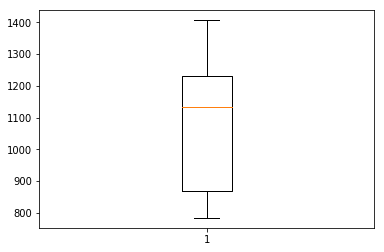

In [300]:
plt.boxplot(cadari_cat_values)

In [302]:
iqr(cadari_cat_values)

362.47500000000014

In [89]:
Kolmogorov(cadari_cat_values)

0

In [90]:
# usando definição de Fisher
kurtosis(cadari_cat_values)

-1.381106585180966

In [91]:
# usando definição de Pearson
kurtosis(cadari_cat_values, fisher=False)

1.618893414819034

In [92]:
shapiro(cadari_cat_values)

(0.9056280255317688, 0.32430094480514526)

In [93]:
shapiro((cadari_cat_values))[0]

0.9056280255317688

In [94]:
skew(cadari_cat_values)


-0.09998618869157293

In [95]:
skew(cadari_cat_values)

-0.09998618869157293

In [96]:
Skewness(cadari_cat_values) 

1

In [97]:
kstest(cadari_cat_values, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [98]:
kurtosistest(cadari_cat_values)

/Users/raissa.costa.brizeno/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


KurtosistestResult(statistic=-1.1325990669312296, pvalue=0.2573826606661188)

In [99]:
skewtest(cadari_cat_values)

SkewtestResult(statistic=-0.16849783891521933, pvalue=0.8661916436615131)

In [104]:
import matplotlib.pyplot as plt

In [211]:
#plt.hist(cadari_cat_values)

#print(kstest(cadari_cat_values, 'norm'))

In [106]:
np.random.normal()

2.2465508100784524

In [212]:
'''
np.random.seed(987654321)
x = stats.norm.rvs(loc=0.2, size=100)
plt.hist(cadari_cat_values, histtype='stepfilled')
kstest(cadari_agua_values,'norm')
'''

"\nnp.random.seed(987654321)\nx = stats.norm.rvs(loc=0.2, size=100)\nplt.hist(cadari_cat_values, histtype='stepfilled')\nkstest(cadari_agua_values,'norm')\n"

In [110]:
matrix = np.array([[1,2],[3,4]])

In [111]:
matrix

array([[1, 2],
       [3, 4]])

In [118]:
matrix.T

array([[1, 3],
       [2, 4]])

In [121]:
kurtosistest(cadari_cat_values, axis=0)

/Users/raissa.costa.brizeno/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


KurtosistestResult(statistic=-1.1325990669312296, pvalue=0.2573826606661188)

In [132]:
kstest(cadari_cat_values, 'norm')[1] > 

False